# Basic Libraries we will be using in our code.

In [1]:
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use("dark_background")

In [2]:
iris = datasets.load_iris() # loading data.

In [3]:
X = iris["data"][:, (2, 3)]  # getting only last 2 columns.
y = (iris["target"]).astype(np.float64)  # getting labels.

In [ ]:
Creating a pipeline (The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters)

In [25]:
svm = Pipeline([
    ("scalere", StandardScaler()), # scaling the values
    ("linear_svc", LinearSVC(C=100, loss="hinge")) # using Linear Support Vector Classification.
])

svm.fit(X, y) # fitting the data using .fit()

C:\Users\Animesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scalere', StandardScaler()),
                ('linear_svc', LinearSVC(C=100, loss='hinge'))])

<ipython-input-26-fb167821eaee>:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y.astype(np.integer),


<AxesSubplot:>

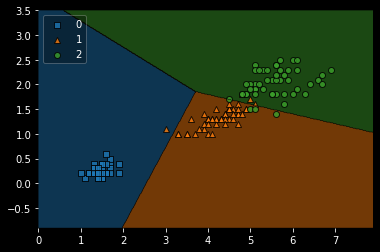

In [26]:
plot_decision_regions(X=X, 
                      y=y.astype(np.integer),
                      clf=svm, 
                      legend=2) # the plot_decision_library from mlxtend helps us to plot the svm boundries easily.

In [31]:
svm.predict([[5, 2.5]]) # predicting the class using custom values.

array([1.])

# Playing around with some more examples.

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=0) # using the moon dataset from sklearn with 100 samples. Noise parameter tells us how much mixed or noisy our data will be.

poly_svm = Pipeline([
    ("ploy", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(loss="hinge", C=1000))
])

poly_svm.fit(X, y) 

C:\Users\Animesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('ploy', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=1000, loss='hinge'))])

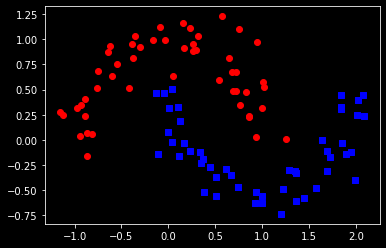

In [12]:
# viewing the moon dataset.
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

# Now we will use different SVM kernels and differnet parameters to see their results.

<AxesSubplot:>

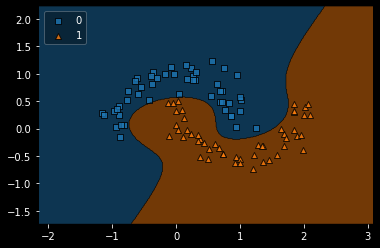

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X, 
                      y=y,
                      clf=poly_svm, 
                      legend=2)

In [14]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

<AxesSubplot:>

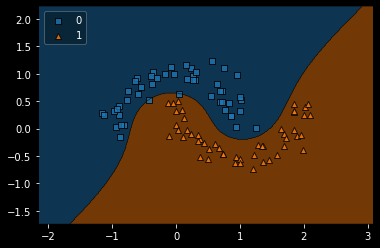

In [15]:
plot_decision_regions(X=X, 
                      y=y,
                      clf=poly_kernel_svm_clf, 
                      legend=2)

In [16]:
rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])

rbf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(C=1000, gamma=0.1))])

<AxesSubplot:>

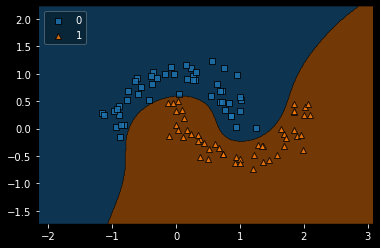

In [17]:
plot_decision_regions(X, y, rbf, legend=2)

In [ ]:
We can also use SMV to Solve regression problems.

In [18]:
d_X, d_y = datasets.load_diabetes(return_X_y=True)

In [19]:
d_X.shape, d_y.shape

((442, 10), (442,))

In [20]:
from sklearn.svm import LinearSVR

In [21]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(d_X, d_y)

LinearSVR(epsilon=1.5)

In [22]:
linear_pred = svm_reg.predict(d_X)

In [23]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

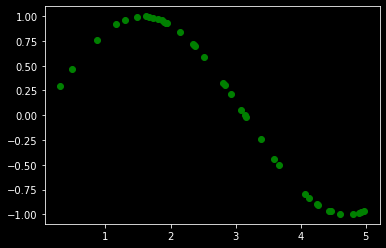

In [24]:
plt.scatter(X, y, color="g")

In [25]:
pred = svm_reg.fit(X, y).predict(X)

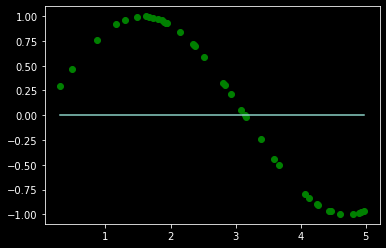

In [36]:
plt.scatter(X, y, color="g")
plt.plot(X, pred) # prediction using Linear SVM (Not good)

In [31]:
from sklearn.svm import SVR
svr_rbf = SVR() # # prediction using Support Vector Regression.

In [32]:
y_rbf = svr_rbf.fit(X, y).predict(X)

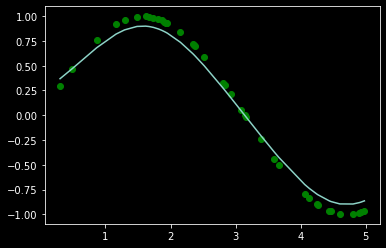

In [33]:
plt.scatter(X, y, color="g")
plt.plot(X, y_rbf)